0. X: [ 7.99667454], Y: [ 21.99334908]
1. X: [ 4.8264575], Y: [ 15.652915]
2. X: [ 5.46739244], Y: [ 16.93478394]
3. X: [ 4.61428356], Y: [ 15.22856712]
4. X: [ 4.86485004], Y: [ 15.72970009]
5. X: [ 2.30627632], Y: [ 10.61255264]
6. X: [ 5.52072477], Y: [ 17.0414505]
7. X: [ 4.73434401], Y: [ 15.46868801]
8. X: [ 1.52665496], Y: [ 9.05331039]
9. X: [ 4.97603846], Y: [ 15.95207691]
10. X: [ 4.75147152], Y: [ 15.50294304]
11. X: [ 3.13439488], Y: [ 12.26878929]
12. X: [ 4.89551735], Y: [ 15.7910347]
13. X: [ 4.96011972], Y: [ 15.92023945]
14. X: [ 3.02303219], Y: [ 12.04606438]
15. X: [ 5.27843523], Y: [ 16.55686951]
16. X: [ 2.89135599], Y: [ 11.78271198]
17. X: [ 8.59559822], Y: [ 23.19119644]
18. X: [ 4.0252099], Y: [ 14.05041981]
19. X: [ 5.91652441], Y: [ 17.83304977]
20. X: [ 5.62176323], Y: [ 17.24352646]
21. X: [ 5.24282503], Y: [ 16.48564911]
22. X: [ 3.65941191], Y: [ 13.31882381]
23. X: [ 3.49728107], Y: [ 12.99456215]
24. X: [ 6.63674736], Y: [ 19.27349472]
25. X: [ 5.797107

/Users/cprakashagr/Virtualenv/Tensorflow/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/cprakashagr/Virtualenv/Tensorflow/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


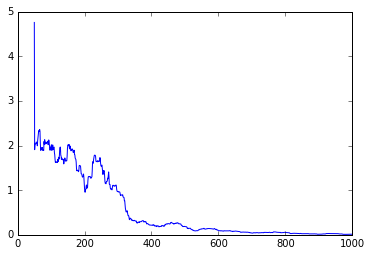

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# y = x * w0 + w1

x = tf.placeholder('float')
y = tf.placeholder('float')

w = tf.Variable([1., 2.], name = 'w')

errors = []

yModel = tf.multiply(x, w[0]) + w[1]

error = tf.square(y - yModel)
trainOp = tf.train.GradientDescentOptimizer(0.01).minimize(error)
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(1000):
#         xVal = np.random.rand()
        xTrain = tf.random_normal((1,), mean=5, stddev=2.0)
        yTrain = xTrain * 2 + 6
        xVal, yVal = session.run([xTrain, yTrain])
        _, errorVal = session.run([trainOp, error], feed_dict={x: xVal, y:yVal})
        errors.append(errorVal)
#         wVal = session.run(w)
        print('{i}. X: {a}, Y: {b}'.format(i=i, a=xVal, b=yVal))
        
    wVal = session.run(w)
    print('Predicted model: {a:.3f}x + {b:.3f}'.format(a=wVal[0], b=wVal[1]))
    
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()


In [ ]:
'''More to explore


GradientDescentOptimizer
AdagradOptimizer
MomentumOptimizer
AdamOptimizer
FtrlOptimizer
RMSPropOptimizer

'''